In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x=np.linspace(-1,1,100)
y=2*x+1

In [13]:
def train_with_batch_size(batch_size,lr=0.1,epochs=50):
    w,b=0.0,0.0
    loss_history=[]
    
    for epoch in range(epochs):
        indices =np.arange(len(x))
        np.random.shuffle(indices)
        
        for start in range(0,len(x),batch_size):
            end=start + batch_size
            batch_idx=indices[start:end]
            
            xb=x[batch_idx]
            yb=y[batch_idx]
            
            y_pred=w*xb+b
            
            dw=np.mean(2*(y_pred-yb)*xb)
            db=np.mean(2*(y_pred-yb))
            
            w -= lr*dw
            b -= lr*db
            
            full_pred=w*x+b
            loss=np.mean((full_pred-y)**2)
            loss_history.append(loss)
        return loss_history
                        

In [14]:
batch_sizes=[1,5,20,100]
results={}
for bs in batch_sizes:
    results[bs]= train_with_batch_size(bs)

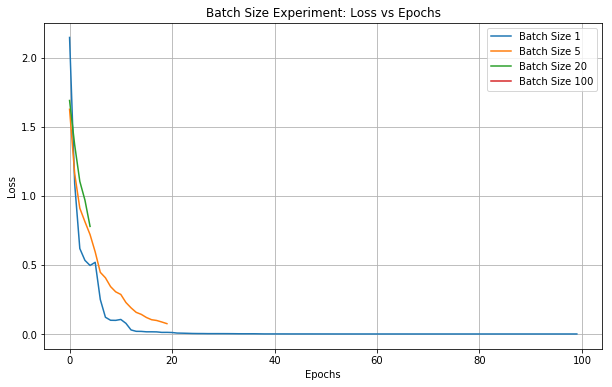

In [15]:
plt.figure(figsize=(10,6))

for bs in batch_sizes:
    plt.plot(results[bs], label=f"Batch Size {bs}")
    
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Batch Size Experiment: Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()
    